# Machine Learning 
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

## Getting Started

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

In [18]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics

In the code cell below, we are calculating the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [19]:
# Minimum price of the data
minimum_price = np.min(prices)

# Maximum price of the data
maximum_price = np.max(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


----

## Developing a Model

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, we will implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [20]:
from sklearn.metrics import r2_score as r2

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2(y_true, y_predict)
    
    # Return the score
    return score

### Implementation: Shuffle and Split Data

For the code cell below, we will do the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [21]:
from sklearn.model_selection import train_test_split as tts

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = tts(features, prices, test_size=0.2, random_state=1)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


----

## Analyzing Model Performance

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased.

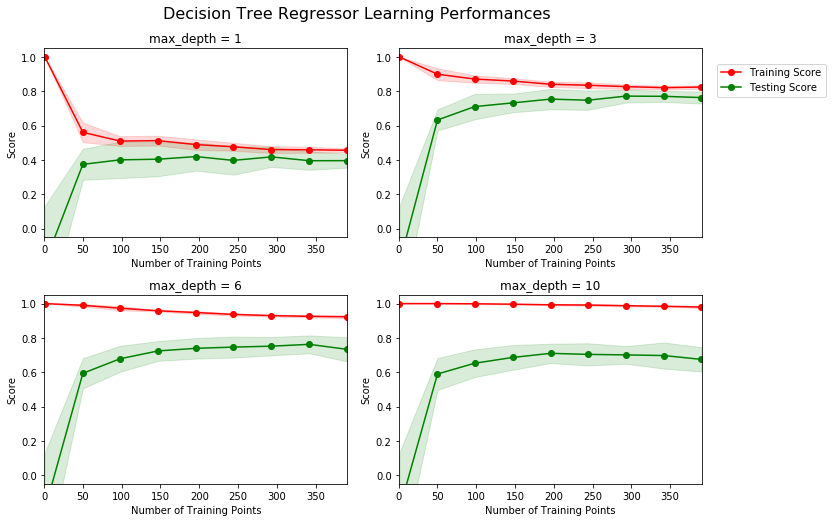

In [22]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

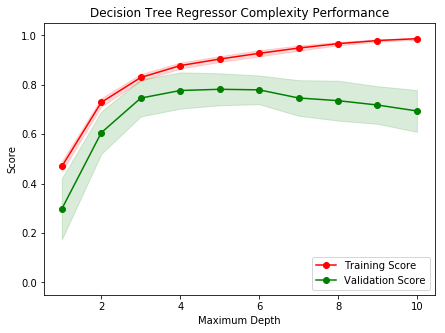

In [23]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff

**Answer: **
At depth 10, the validation score is very poor. This is due to high variance. In this case, the 10 levels have caused the model to remember the data rather than learn from it. 10 levels may be too complex for this data. 


At depth 10, we can see that the model has a nearly perfect training score(1). But at the same time, the validation score is not good. It is lower than at depth=4. This clearly reflects that the model has overfitted the training data points and hence performed poorly on the eval points. We can also conclude that it will perform poorly on the testing data. This is a case of high variance.


At depth = 1 the validation score is low as pointed out by the reviewer, but in that cases, the training score is also poor unlike depth = 10. So that model suffers from high bias. This is reflected from the low training (0.4) and eval score (0.2).</b>


At depth 1 (root -> level_1), the model is too simple to make predictions and has high bias.
The perfect tradeoff is achieved at depth = 3 as seen in the above graphs as well.

-----

## Evaluating Model Performance

### Grid Search

Grid search is a technique to find the best combination of hyperparameters if there are multiple for an algorithm. If there is only 1 parameter, we can simply check the R2 score for each hyperparameter. But incase we have multiple, we use the Grid technique.
The Grid has the hypermeters against each other in a matrix style structure and each entry (i,j) would have the performance for the combination. 
For example, plotting the kervel v/s gamma in the case of SVMs. We can find out the best combination of gamma and kernel choice to get the best score.

### Implementation: Fitting a Model
Implementing the **decision tree algorithm**. To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In [24]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = dtr()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = { "max_depth" : list(range(1, 11)) }

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(cv = cv_sets, estimator = regressor, param_grid = params, scoring = scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. We can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Optimal Model

The below code block will find the optimal depth for the tree.

In [25]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 5 for the optimal model.


### Question 10 - Predicting Selling Prices
Prediction for 3 cases:

| Feature | Case 1 | Case 2 | Case 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |


In [26]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Case {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Case 1's home: $419,700.00
Predicted selling price for Case 2's home: $287,100.00
Predicted selling price for Case 3's home: $927,500.00


**Analysis with respect to the data**

<b>

    Client1: The clients house is predicted by the model to be valued at 420K USD. In the dataset, the house with price around 420K have 6 bedrooms ( around 5.8) but the poverty rate is 11-14%. Student to teacher ratio is also lower for that range. Its lesser than the national average (454K) where approximately all houses have 6 rooms. This looks like a fair estimation.
    
    Client2: I arranged the data in decreasing ordering by poverty rate in MS Excel and the average of the first 15 values (highest LSTAT) is 222K USD. Average of RM is 5 and PTRATIO is 19. This house has 4 bedrooms, higher PTRATIO but a very high LSTAT. Not sure about this one. Maybe a little high for this LSTAT.
    
    Client3: This is very straighforward. The most expensive house in our list has similar features [8.398	5.91	13] = 1.02M. This house could also go for a little higher price maybe 9.5K to even 1M as it has a very low LSTAT.
</b>

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [27]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


-----

## Exploratory Data Analysis

We can plot the MEDV(y) values against each of the features to see the effect of indivisual feature on the target variable. 

In [31]:
%%html
<img src = "Screen_Shot_1.png">
<img src = "Screen_Shot_2.png">